In [10]:
import pickle

with open('chronological_ndcgs_results_special.pkl', 'rb') as f:
    all_ndcgs = pickle.load(f)
    # del all_ndcgs['LTR'], all_ndcgs['Tribler'], all_ndcgs['DINX (seeders)']

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
min_window_size = 1  # Minimum window size for smoothing
max_window_size = 10  # Maximum window size for smoothing
k = 10

start_x = 6  # First data point corresponds to x = 6
x_step = 1   # Increment step for x-values

for algo_name, ndcgs in all_ndcgs.items():
    x = np.arange(start_x, start_x + len(ndcgs[k]) * x_step, x_step)
    smoothed_ndcgs = log_adaptive_moving_average(ndcgs[k], x, min_window_size, max_window_size)
    x_smoothed = x[:len(smoothed_ndcgs)]
    plt.plot(x_smoothed, smoothed_ndcgs, label=algo_name)

plt.xscale('log')
plt.xlabel('Training Examples (log scale)')
plt.ylabel('nDCG@10')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
if False:
    plt.legend(
        loc='upper center', 
        bbox_to_anchor=(0.5, 1.3),  # Increase vertical distance
        ncol=4, 
        frameon=False
    )
plt.show()

NameError: name 'log_adaptive_moving_average' is not defined

<Figure size 1200x800 with 0 Axes>

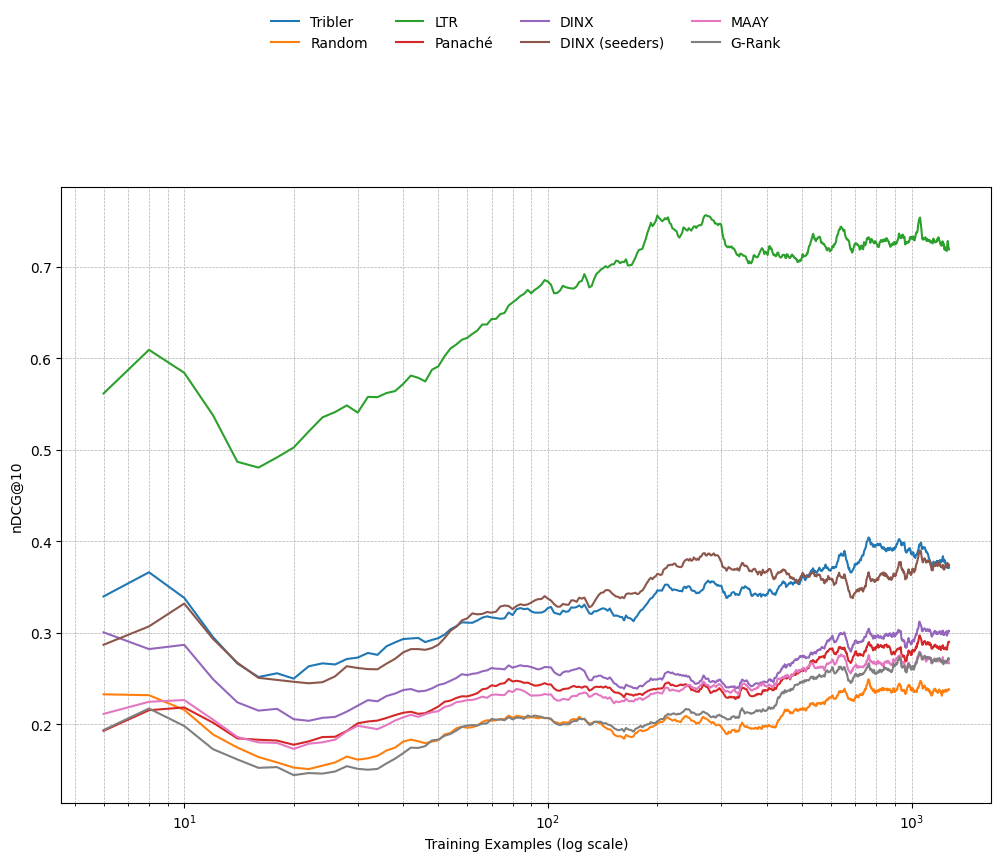

In [13]:
import matplotlib.pyplot as plt
import tikzplotlib
import numpy as np

with open('chronological_ndcgs_results.pkl', 'rb') as f:
    all_ndcgs = pickle.load(f)

def log_adaptive_moving_average(data, x, min_window, max_window):
    """Apply adaptive smoothing where the window size grows logarithmically with x."""
    smoothed_data = []
    for i in range(len(data)):
        # Compute window size based on the logarithm of x
        log_x = np.log(x[i] / x[0] + 1)  # Normalize log(x) to avoid log(0)
        max_log_x = np.log(x[-1] / x[0] + 1)  # Logarithm of the largest x
        window_size = int(min_window + (max_window - min_window) * (log_x / max_log_x))
        # Ensure valid window size (truncate window at array boundary)
        start_idx = max(0, i - window_size // 2)
        end_idx = min(len(data), i + window_size // 2)
        smoothed_data.append(np.mean(data[start_idx:end_idx]))
    return np.array(smoothed_data)

plt.figure(figsize=(12, 8))
min_window_size = 4  # Minimum window size for smoothing
max_window_size = 200  # Maximum window size for smoothing
k = 10

start_x = 6  # First data point corresponds to x = 6
x_step = 2   # Increment step for x-values

for algo_name, ndcgs in all_ndcgs.items():
    x = np.arange(start_x, start_x + len(ndcgs[k]) * x_step, x_step)
    smoothed_ndcgs = log_adaptive_moving_average(ndcgs[k], x, min_window_size, max_window_size)
    x_smoothed = x[:len(smoothed_ndcgs)]
    plt.plot(x_smoothed, smoothed_ndcgs, label=algo_name)

plt.xscale('log')
plt.xlabel('Training Examples (log scale)')
plt.ylabel('nDCG@10')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.3),  # Increase vertical distance
    ncol=4, 
    frameon=False
)

# plt.show()

def tikzplotlib_fix_ncols(obj):
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    if hasattr(obj, 'gcf'):
        fig = obj.gcf()
        for ax in fig.get_axes():
            if hasattr(ax, 'legend_') and ax.legend_ is not None:
                if hasattr(ax.legend_, "_ncols"):
                    ax.legend_._ncol = ax.legend_._ncols
    else:
        for child in obj.get_children():
            tikzplotlib_fix_ncols(child)

tikzplotlib_fix_ncols(plt)

tikzplotlib.save("ndcg_plot.tex", axis_width=r'\columnwidth', axis_height=r'6cm')

In [31]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

chosen_indices = []
for user in os.listdir("crawl"):
    user_path = os.path.join("crawl", user)
    if not os.path.isdir(user_path):
        continue
        
    for json_file in os.listdir(user_path):
        if not json_file.endswith('.json'):
            continue
            
        with open(os.path.join(user_path, json_file)) as f:
            data = json.load(f)
            if data["chosen_index"] == -1:
                continue
            chosen_indices.append(data["chosen_index"])

len(chosen_indices)

8639

In [5]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

chosen_indices = []
for user in os.listdir("crawl"):
    user_path = os.path.join("crawl", user)
    if not os.path.isdir(user_path):
        continue
        
    for json_file in os.listdir(user_path):
        if not json_file.endswith('.json'):
            continue
            
        with open(os.path.join(user_path, json_file)) as f:
            data = json.load(f)
            if data["chosen_index"] == -1:
                continue
            chosen_indices.append(data["chosen_index"])

len(chosen_indices)

9243

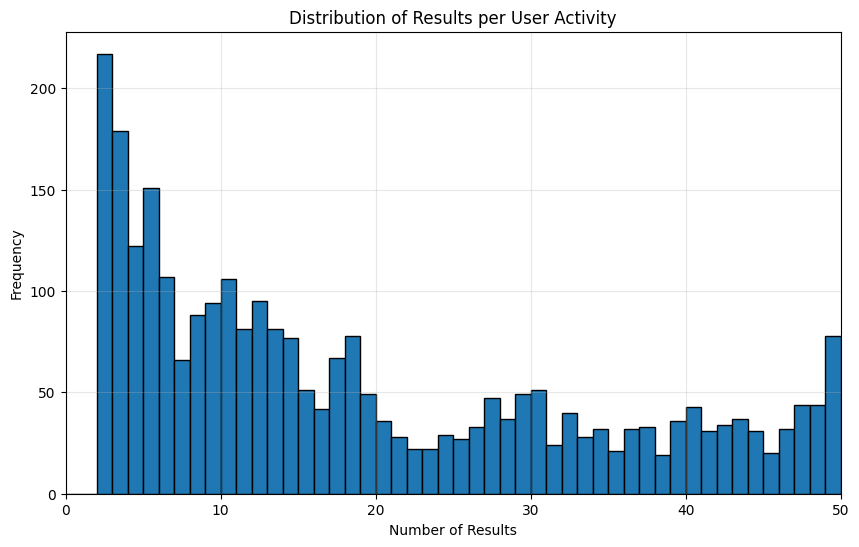

Number of activities with only one result: 518
Percentage of activities with only one result: 9.85%
Mean number of results per activity: 67.55
Median number of results per activity: 47.00


In [28]:
# Plot distribution of results per user activity
plt.figure(figsize=(10, 6))

with open('user_activities.pkl', 'rb') as f:
    user_activities = pickle.load(f)

result_counts = [len(ua.results) for ua in user_activities]

plt.hist(result_counts, bins=range(51), edgecolor='black')
plt.xlabel('Number of Results')
plt.ylabel('Frequency') 
plt.title('Distribution of Results per User Activity')
plt.grid(True, alpha=0.3)
plt.xlim(0, 50)
plt.show()

# Count activities with only one result
single_result_count = sum(1 for ua in user_activities if len(ua.results) < 5)
print(f"Number of activities with only one result: {single_result_count}")
print(f"Percentage of activities with only one result: {single_result_count/len(user_activities)*100:.2f}%")
# Calculate and print mean and median of result counts
mean_results = np.mean(result_counts)
median_results = np.median(result_counts)
print(f"Mean number of results per activity: {mean_results:.2f}")
print(f"Median number of results per activity: {median_results:.2f}")




In [22]:
def plot_chosen_indices(ranking_algo):
    with open(f'user_activities_{ranking_algo}.pkl', 'rb') as f:
        user_activities = pickle.load(f)
        
    chosen_indices = []
    for ua in user_activities:
        if ua.chosen_result is None:
            continue
        try:
            chosen_idx = next(i for i, r in enumerate(ua.results) if r.infohash == ua.chosen_result.infohash) + 1
            chosen_indices.append(chosen_idx)
        except StopIteration:
            # Skip if the chosen result isn't found in results list
            continue

    print(len(chosen_indices))
    avg_chosen_index = np.mean(chosen_indices)
    median_chosen_index = np.median(chosen_indices)
    print(f"Average chosen_index: {avg_chosen_index:.2f}")
    print(f"Median chosen_index: {median_chosen_index:.2f}")

    plt.figure(figsize=(10, 6))
    xlimit = 30
    plt.hist([x for x in chosen_indices if x <= xlimit], bins=range(xlimit+1), edgecolor='black')
    plt.axvline(avg_chosen_index, color='red', linestyle='-', label=f'Mean: {avg_chosen_index:.2f}')
    plt.axvline(median_chosen_index, color='green', linestyle='-', label=f'Median: {median_chosen_index:.2f}')
    plt.xlabel('Clicked Position')
    plt.ylabel('Frequency')
    # plt.yscale('log')
    plt.xlim(1, None)
    plt.xlim(0.5, xlimit+0.5)
    plt.xticks([1] + list(range(5, xlimit+1, 5)))
    plt.legend()
    plt.grid(True, alpha=0.3)

    tikzplotlib_fix_ncols(plt)
    tikzplotlib.save(
        f"chosen_indices_{ranking_algo.lower()}.tex",
        axis_width=r'\columnwidth',
        axis_height=r'4cm')
    # plt.show()

1052
Average chosen_index: 22.93
Median chosen_index: 6.00


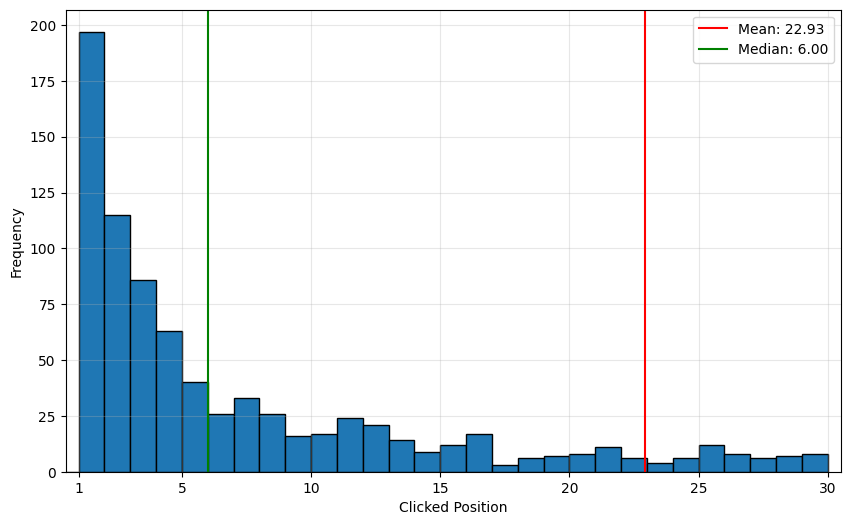

In [23]:
plot_chosen_indices("Tribler")

1039
Average chosen_index: 1.56
Median chosen_index: 1.00


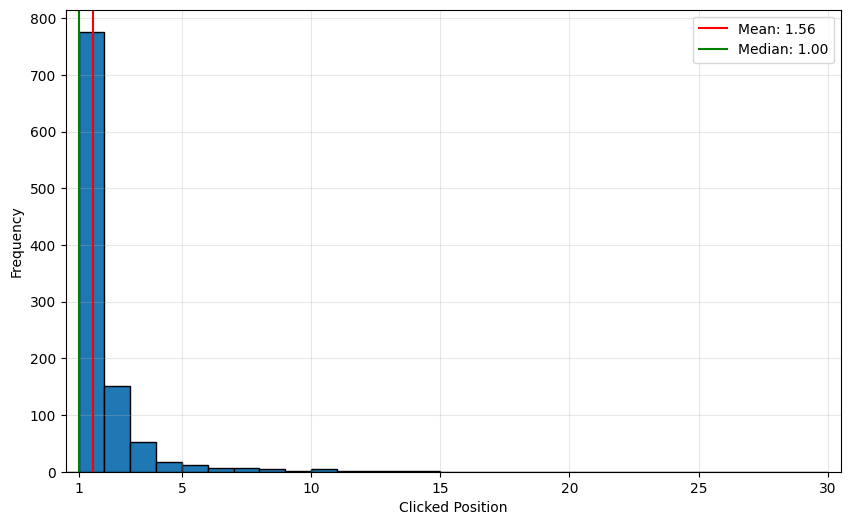

: 

In [24]:
plot_chosen_indices("LTR")

In [60]:
with open('chronological_ndcgs_results.pkl', 'rb') as f:
    chronological_ndcgs = pickle.load(f)
chronological_ndcgs['LTR']


{5: [0.408,
  0.097,
  1.0,
  0.612,
  0.0,
  0.054,
  0.417,
  0.658,
  0.666,
  0.553,
  0.627,
  0.774,
  0.75,
  1.0,
  0.649,
  0.641,
  0.908,
  0.908,
  0.885,
  0.375,
  0.0,
  0.133,
  0.641,
  0.188,
  0.173,
  0.062,
  0.048,
  0.079,
  0.633,
  0.151,
  0.125,
  0.695,
  0.954,
  0.712,
  0.649,
  0.954,
  0.612,
  0.57,
  0.783,
  0.875,
  0.595,
  0.72,
  0.769,
  0.508,
  0.619,
  0.079,
  0.908,
  1.0,
  0.32,
  0.783,
  0.804,
  0.5,
  0.329,
  0.829,
  0.69,
  0.877,
  0.808,
  0.866,
  0.438,
  0.173,
  0.741,
  0.954,
  1.0,
  0.835,
  0.908,
  1.0,
  0.874,
  0.908,
  0.908,
  1.0,
  0.595,
  0.775,
  0.695,
  0.869,
  0.908,
  0.72,
  1.0,
  0.641,
  0.954,
  0.799,
  0.658,
  0.72,
  1.0,
  0.75,
  1.0,
  1.0,
  0.954,
  0.704,
  0.908,
  1.0,
  0.883,
  0.916,
  0.829,
  0.329,
  0.954,
  0.704,
  0.908,
  1.0,
  0.908,
  0.954,
  0.527,
  0.32,
  0.304,
  0.048,
  0.697,
  0.962,
  0.954,
  0.954,
  0.516,
  0.508,
  0.619,
  0.641,
  0.619,
  0.954,
  0.954,
 